#### Implement by ourselves (Not utilise API)

Keypoint: Modify activation function of Adaline from linear to sigmoid

In [32]:
import numpy as np 

In [33]:
class LogisticRegressionGD(object):

    '''
    Parameters
    ------------
    eta: float
        Learning rate.
    n_iter: int
        Total iterations over training set.
    random_state: int
        Random number generator seed for
        random weight generation.
    
    Attributes
    ------------
    w_: 1d-array
        Weights after fitting.
    cost_: list
        Sum-of-square cost function value in each epoch.
    '''

    def __init__(self, eta=0.05, n_iter=40, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        ''' Fit training data.

        Parameters
        -----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples
            and n_features is the number of features.
        y : {vector-like}, shape = [n-samples]
            Target values.
        
        Return
        -----------
        self : object
        '''
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y - output
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()

            # compute the logistic `cost`
            cost = (-y.dot(np.log(output))) - (1-y).dot(np.log(1-output))
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        '''Calculate net input'''
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, z):
        '''Return the value after activation using sigmoid function.'''
        return 1./(1. + np.exp(-np.clip(z, -250, 250)))
        # return z
    
    def predict(self, X):
        '''Return class label after unit step'''
        # note that we use `net_input` here -> why?
        return np.where(self.net_input(X) >= 1, 1.0, 0.0)

In [34]:
# load in data
from sklearn import datasets

df = datasets.load_iris()

X_train = df.data[:, [2,3]]
y_train = df.target

In [35]:
# define plot_decision_regions function again
# 只是画图，下次没必要自己打
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None,
                          resolution=0.2):
    
    # set up markers
    markers = ['s', 'x', 'o', '^', 'v']
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
    # set valid colors based on y
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 0].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolor='black')
        # select the 0 and 1 column of samples where y=cl
    
    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='none', edgecolors='black', alpha=1.0,
                    linewidths=1, marker='o',
                    s=100, label='test set')

/var/folders/84/kh2lnvxd5cx0_6s9tdvbhyd00000gn/T/ipykernel_5165/1273058215.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],


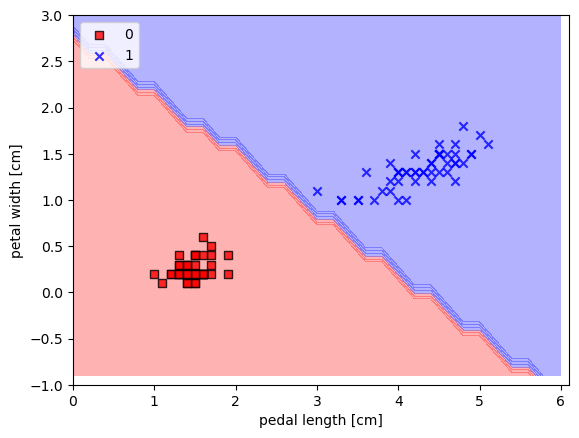

In [36]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.001, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

plot_decision_regions(X=X_train_01_subset,
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.ylim(-1,3)
plt.xlabel('pedal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()